## Overview
1. [Persiapan](#Persiapan)
2. [Pertemuan 1](#Pertemuan-1)
3. [Pertemuan 2](#Pertemuan-2)
4. [Pertemuan 3](#Pertemuan-3)

<header style="width: 100%;">
    <h3 style="text-align: center;">Persiapan</h3>
</header>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

from cmath import sqrt
from scipy.fft import fft, ifft
from scipy.signal import convolve

In [2]:
def ricker_wavelet(f,tn,dt):
    t = np.arange(-tn/2,tn/2+dt,dt)/1000
    w = (1-2*np.pi**2*f**2*t**2)*np.exp(-np.pi**2*f**2*t**2)
    return t, w

frekuensi = 30
sampling_rate = 2
waktu = 100
t,w = ricker_wavelet(frekuensi,waktu,sampling_rate)

In [3]:
def DFT(x):
    # Deklarasi variabel
    N = len(x)
    X = [0]*N
    j = sqrt(-1)
    
    # Algoritma
    for k in range(0,N):
        for n in range(0,N):
            X[k] += x[n]*(np.exp((-j* 2 * np.pi * k * n)/N))

    return X

In [4]:
def IDFT(X):
    # Deklarasi variabel
    N = len(X)
    x = [0]*N
    j = sqrt(-1)
    
    # Algoritma
    for n in range(0,N):
        for k in range(0,N):
            x[n] += 1/N*X[k]*(np.exp((j* 2 * np.pi * k * n)/N))

    return x

In [5]:
t = np.arange(-2*np.pi, 2*np.pi+0.01, 0.01)
T = 2*np.pi

def squareWave(x):
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = 0

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = 0
                negativeOne = 1
            else:
                one = 1
                negativeOne = 0

# fungsi ganjil
def bn(n):
    if (n%2 != 0):
        return 2/(np.pi*n)
    else:
        return 0

# omega_n
def wn(n):
    wn = (2*np.pi*n)/T
    return wn


def fourierSeries(t,n_max):
    a0 = 1/2
    y = a0
    for n in range(0,n_max):
        y = y + bn(n) * np.sin(wn(n)*t)
    return y

n = 10
y = []
ft = []

for i in t:
    y.append(squareWave(i))
    ft.append(fourierSeries(i,n))

<header style="width: 100%;">
    <h3 style="text-align: center;">Pertemuan 1</h3>
</header>

#### 1. Buatlah pencuplikan Nyquist dengan sinyal cosinus. Pengali untuk frekuensinya yaitu 2, 10, 25, 50, dan 100 serta visualisasikan!

In [6]:
f = 2
t = np.arange(0,1+0.001,0.001)
y = np.cos(2*np.pi*f*t)

sinyal_asli = {'x': t, 'y': y}

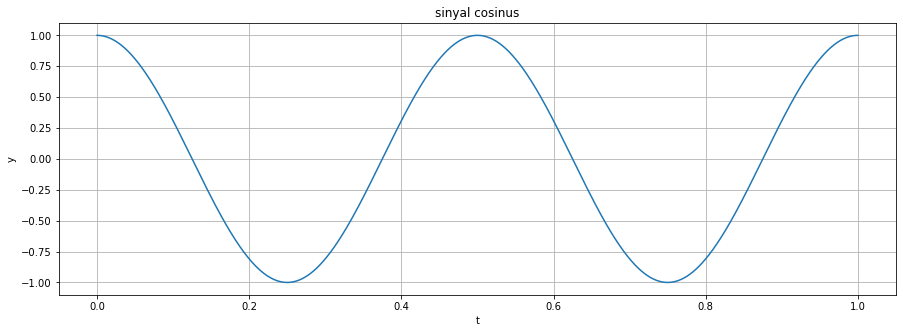

In [7]:
plt.figure(figsize=(15,5))
plt.plot(t,y)
plt.title('sinyal cosinus')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

In [8]:
def nyquist(cuplikan, frekuensi, sinyal_asli):
    X = sinyal_asli['x']
    Y = sinyal_asli['y']
    
    t = np.arange(0,1+(1/(cuplikan*f)),1/(cuplikan*f))
    y = np.cos(2*np.pi*f*t)
    
    plt.figure(figsize=(15,5))
    plt.plot(X,Y)
    plt.stem(t,y,'orange', markerfmt='o',use_line_collection=True)
    plt.title(f'pencuplikan {cuplikan} kali')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    return t,y

#### Pencuplikan 2 kali

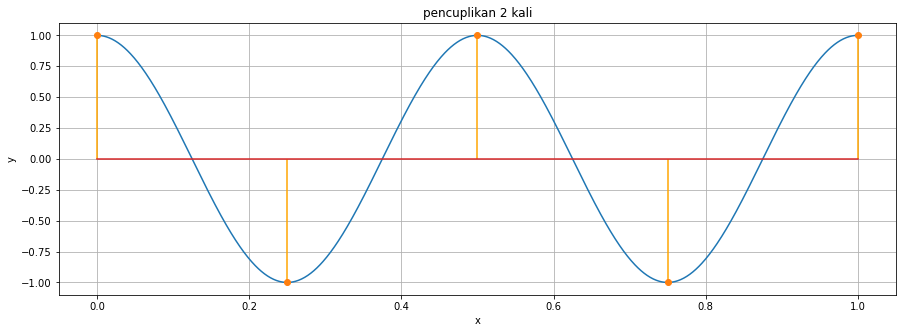

In [9]:
cuplikan1 = 2
t1, y1 = nyquist(cuplikan1, f, sinyal_asli)

#### Pencuplikan 10 kali

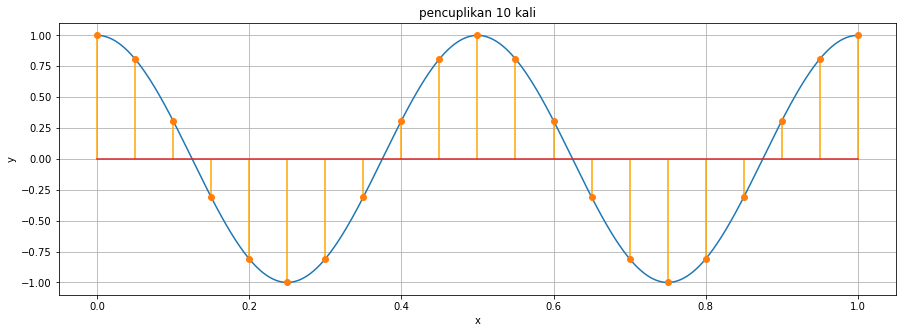

In [10]:
cuplikan2 = 10
t2, y2 = nyquist(cuplikan2, f, sinyal_asli)

#### Pencuplikan 25 kali

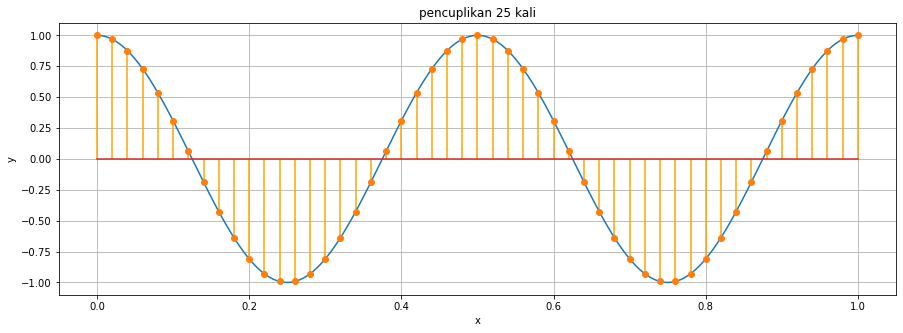

In [12]:
cuplikan3 = 25
t3, y3 = nyquist(cuplikan3, f, sinyal_asli)

#### Pencuplikan 50 kali

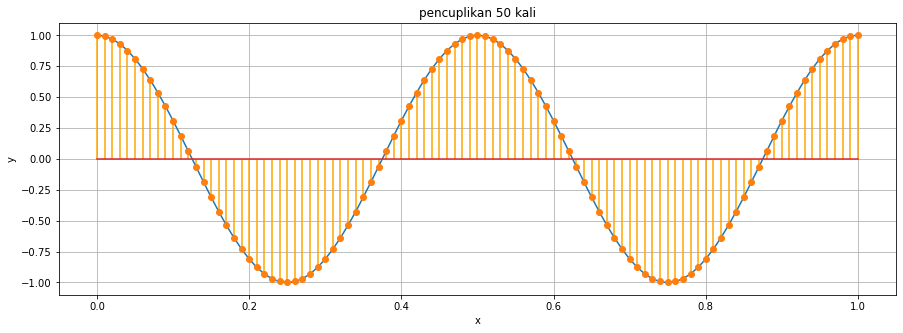

In [14]:
cuplikan4 = 50
t4, y4 = nyquist(cuplikan4, f, sinyal_asli)

#### Pencuplikan 100 kali

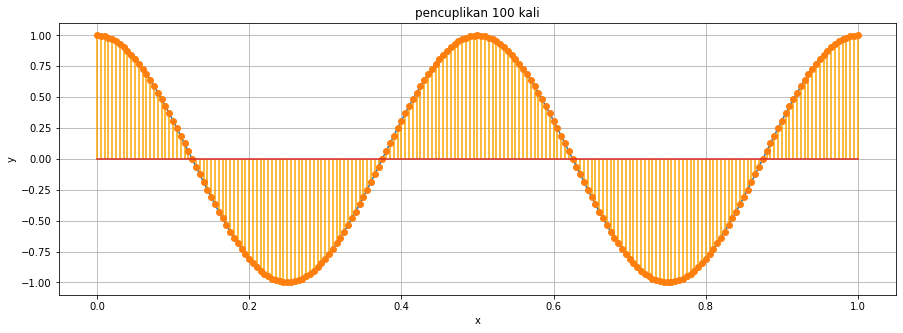

In [16]:
cuplikan5 = 100
t5, y5 = nyquist(cuplikan5, f, sinyal_asli)

#### 2. Konvolusikan hasil pencuplikan dari soal 1 dengan ricker wavelet serta visualisasikan!

#### wavelet * pencuplikan 2 kali

In [18]:
cuplikan_2kali = convolve(y1,w,mode = 'same')

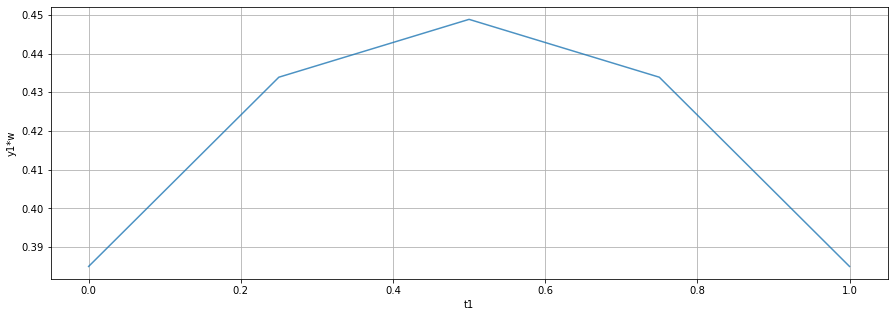

In [19]:
plt.figure(figsize=(15,5))
plt.plot(t1, cuplikan_2kali, alpha=0.8)
plt.xlabel('t1')
plt.ylabel('y1*w')
plt.grid()

#### wavelet * pencuplikan 10 kali

In [20]:
cuplikan_10kali = convolve(y2,w,mode = 'same')

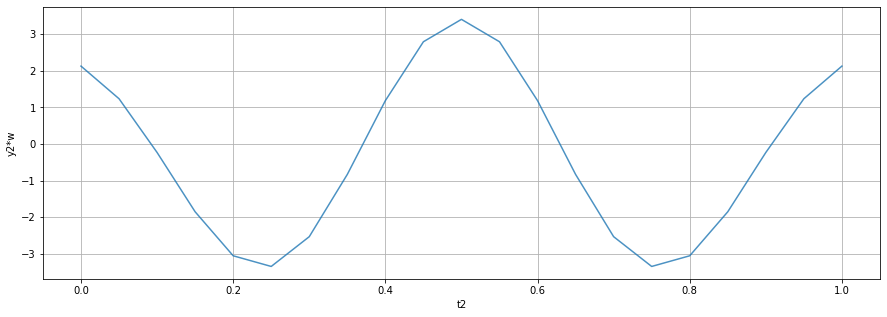

In [21]:
plt.figure(figsize=(15,5))
plt.plot(t2,cuplikan_10kali, alpha=0.8)
plt.xlabel('t2')
plt.ylabel('y2*w')
plt.grid()

#### wavelet * pencuplikan 25 kali

In [22]:
cuplikan_25kali = convolve(y3,w,mode = 'same')

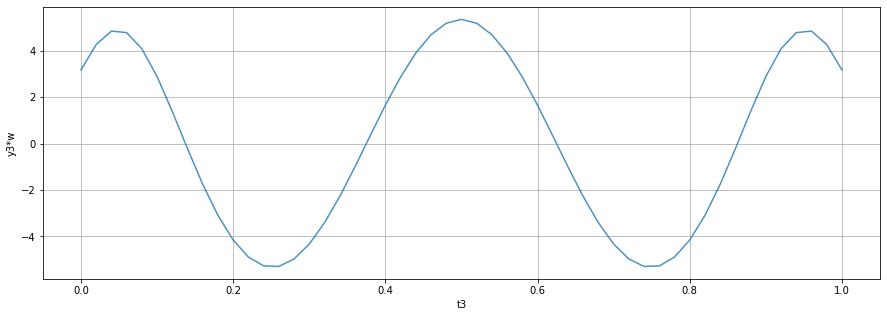

In [23]:
plt.figure(figsize=(15,5))
plt.plot(t3,cuplikan_25kali, alpha=0.8)
plt.xlabel('t3')
plt.ylabel('y3*w')
plt.grid()

#### wavelet * pencuplikan 50 kali

In [24]:
cuplikan_50kali = convolve(y4,w,mode = 'same')

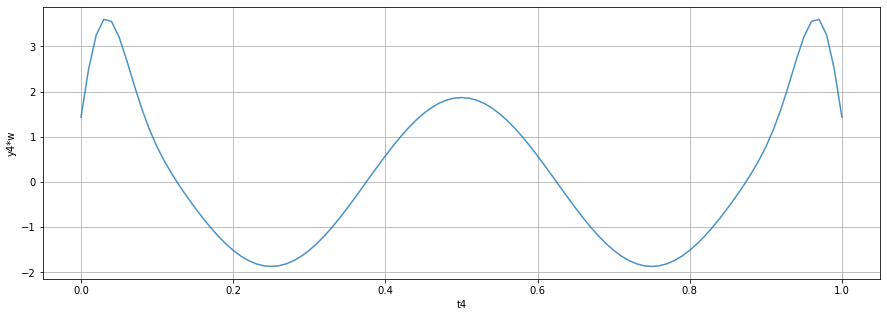

In [25]:
plt.figure(figsize=(15,5))
plt.plot(t4,cuplikan_50kali, alpha=0.8)
plt.xlabel('t4')
plt.ylabel('y4*w')
plt.grid()

#### wavelet * pencuplikan 100 kali

In [26]:
cuplikan_100kali = convolve(y5,w,mode = 'same')

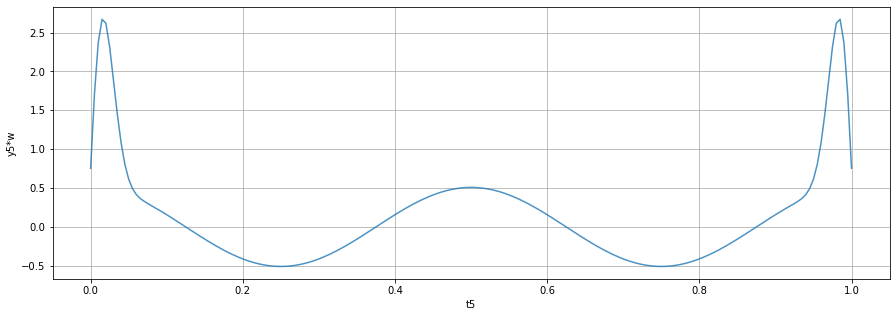

In [27]:
plt.figure(figsize=(15,5))
plt.plot(t5,cuplikan_100kali, alpha=0.8)
plt.xlabel('t5')
plt.ylabel('y5*w')
plt.grid()

<header style="width: 100%;">
    <h3 style="text-align: center;">Pertemuan 2</h3>
</header>

#### 3. Lakukan transformasi fourier diskrit dan invers transformasi fourier diskrit 1 dimensi pada hasil soal no 1 dan soal no 2 serta visualisasikan!

#### Tranformasi fourier diskrit pada hasil soal 1 untuk y1, y2, y3, y4, y5 berturut-turut

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


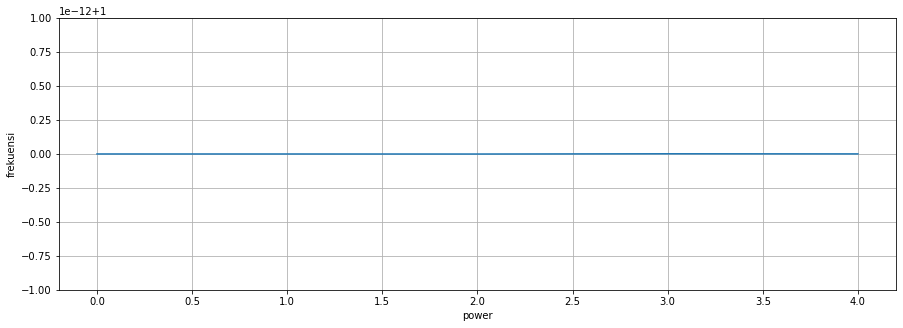

In [28]:
dft1 = DFT(y1)

plt.figure(figsize=(15,5))
plt.plot(dft1)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

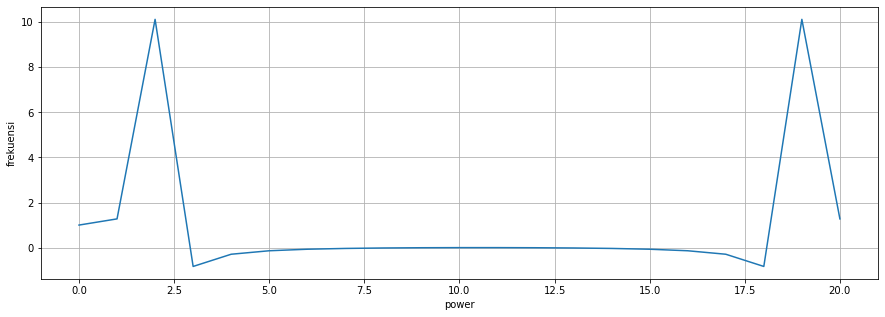

In [29]:
dft2 = DFT(y2)

plt.figure(figsize=(15,5))
plt.plot(dft2)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

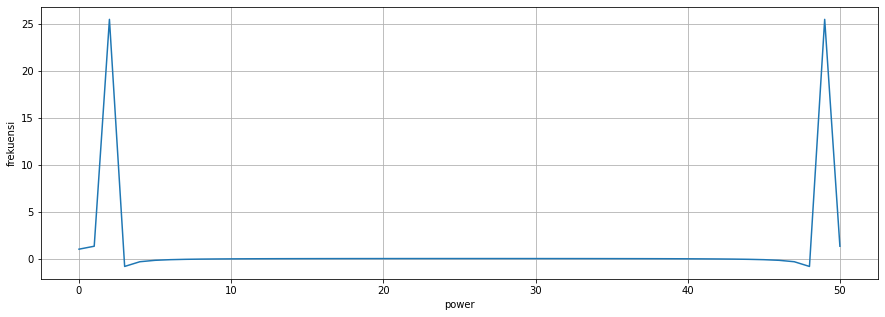

In [30]:
dft3 = DFT(y3)

plt.figure(figsize=(15,5))
plt.plot(dft3)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

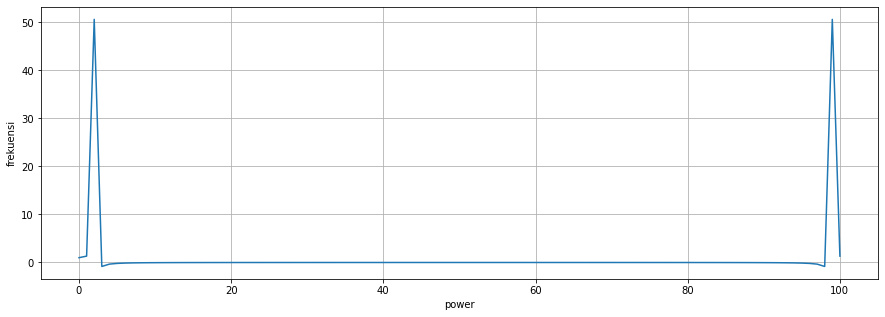

In [31]:
dft4 = DFT(y4)

plt.figure(figsize=(15,5))
plt.plot(dft4)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

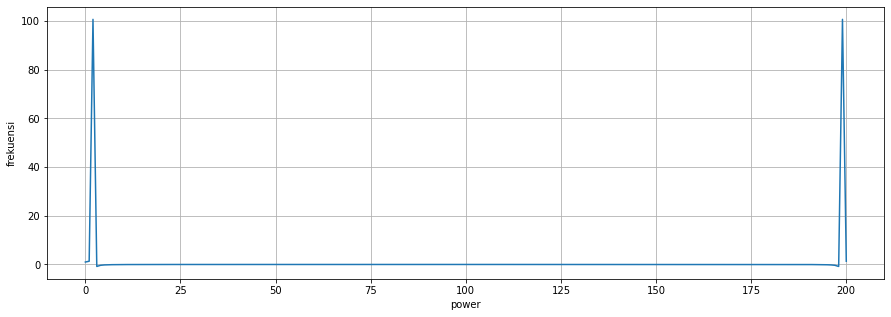

In [32]:
dft5 = DFT(y5)

plt.figure(figsize=(15,5))
plt.plot(dft5)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

#### Invers transformasi fourier diskrit pada hasil soal 1 untuk y1, y2, y3, y4, y5 berturut-turut

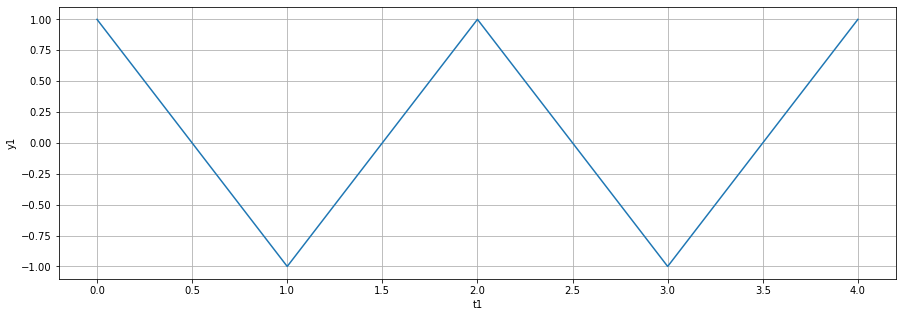

In [33]:
idft1 = IDFT(dft1)

plt.figure(figsize=(15,5))
plt.plot(idft1)
plt.xlabel('t1')
plt.ylabel('y1')
plt.grid()
plt.show()

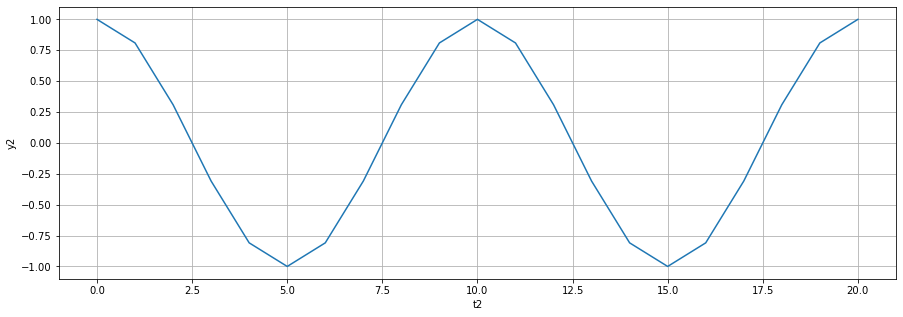

In [34]:
idft2 = IDFT(dft2)

plt.figure(figsize=(15,5))
plt.plot(idft2)
plt.xlabel('t2')
plt.ylabel('y2')
plt.grid()
plt.show()

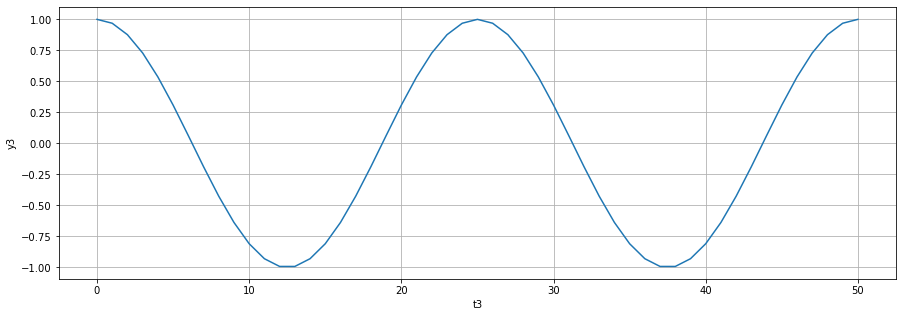

In [35]:
idft3 = IDFT(dft3)

plt.figure(figsize=(15,5))
plt.plot(idft3)
plt.xlabel('t3')
plt.ylabel('y3')
plt.grid()
plt.show()

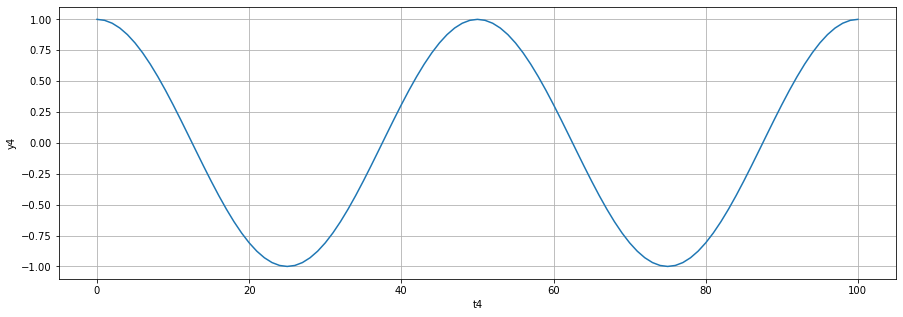

In [36]:
idft4 = IDFT(dft4)

plt.figure(figsize=(15,5))
plt.plot(idft4)
plt.xlabel('t4')
plt.ylabel('y4')
plt.grid()
plt.show()

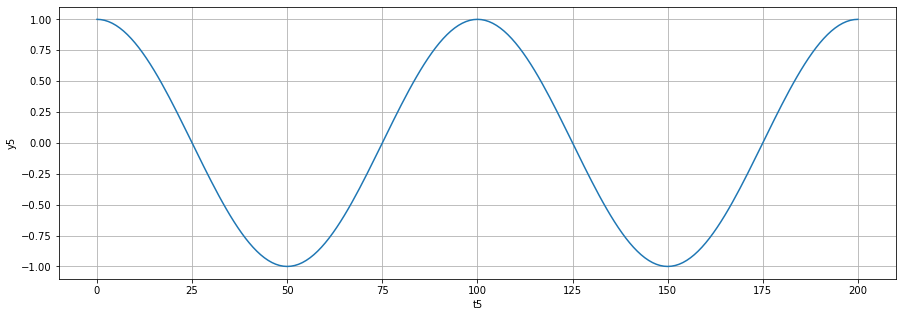

In [37]:
idft5 = IDFT(dft5)

plt.figure(figsize=(15,5))
plt.plot(idft5)
plt.xlabel('t5')
plt.ylabel('y5')
plt.grid()
plt.show()

#### 4. Lakukan transformasi fourier cepat dan invers transformasi fourier cepat 1 dimensi pada hasil soal no 1 dan soal no 2 serta visualisasikan!

#### Tranformasi fourier cepat pada hasil soal 1 untuk y1, y2, y3, y4, y5 berturut-turut

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


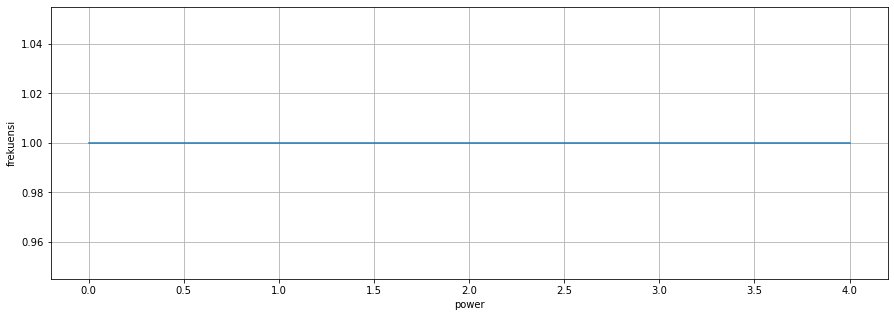

In [38]:
fft1 = fft(y1)

plt.figure(figsize=(15,5))
plt.plot(fft1)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


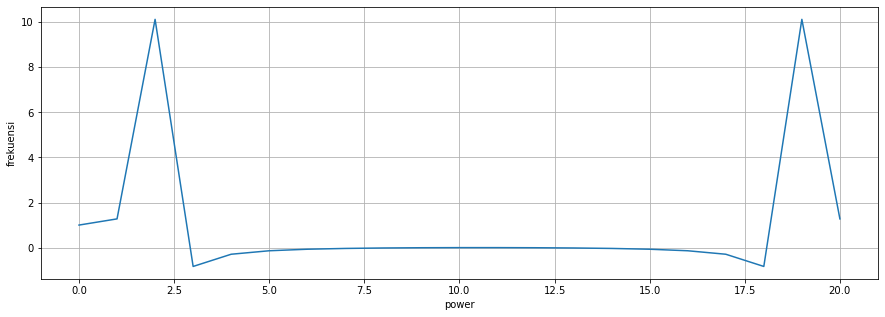

In [39]:
fft2 = fft(y2)

plt.figure(figsize=(15,5))
plt.plot(fft2)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


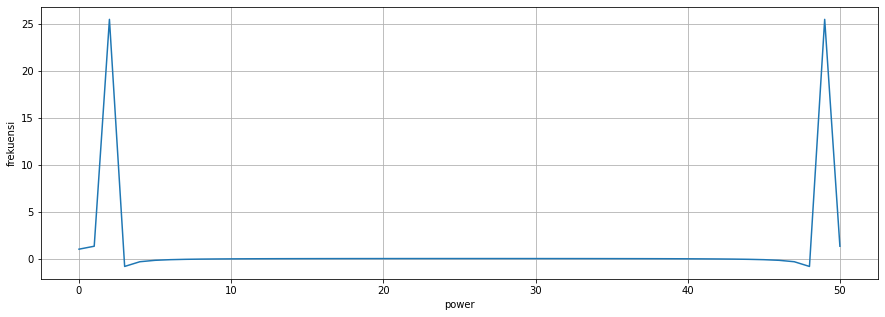

In [40]:
fft3 = fft(y3)

plt.figure(figsize=(15,5))
plt.plot(fft3)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


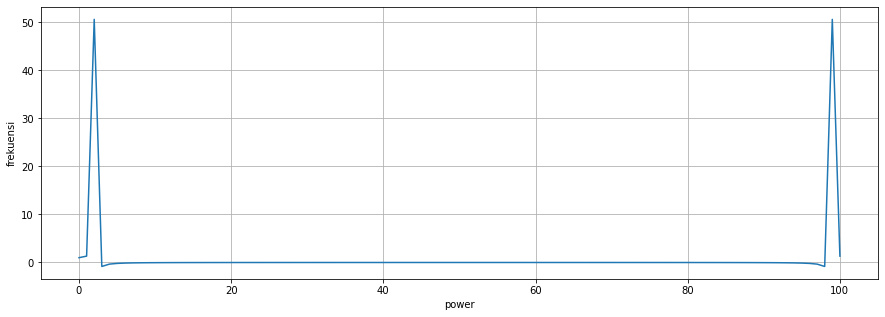

In [41]:
fft4 = fft(y4)

plt.figure(figsize=(15,5))
plt.plot(fft4)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


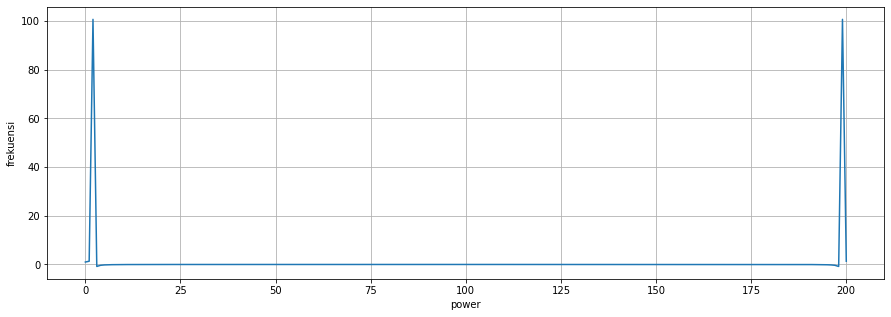

In [42]:
fft5 = fft(y5)

plt.figure(figsize=(15,5))
plt.plot(fft5)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

#### Invers transformasi fourier cepat pada hasil soal 1 untuk y1, y2, y3, y4, y5 berturut-turut

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


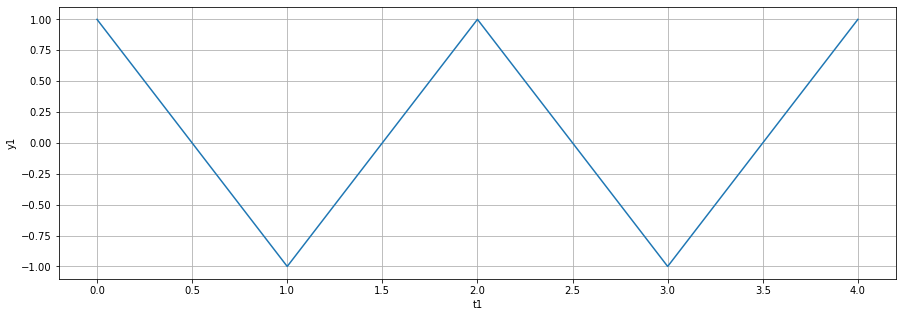

In [43]:
ifft1 = ifft(fft1)

plt.figure(figsize=(15,5))
plt.plot(ifft1)
plt.xlabel('t1')
plt.ylabel('y1')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


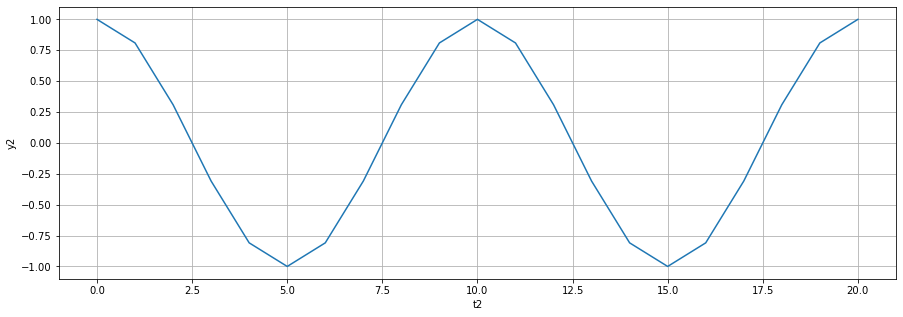

In [44]:
ifft2 = ifft(fft2)

plt.figure(figsize=(15,5))
plt.plot(ifft2)
plt.xlabel('t2')
plt.ylabel('y2')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


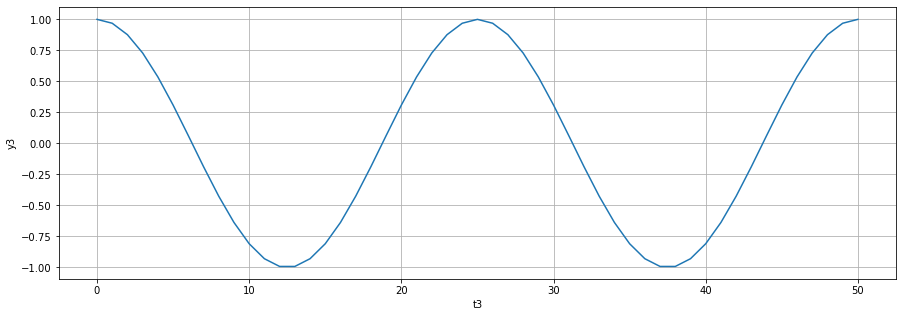

In [45]:
ifft3 = ifft(fft3)

plt.figure(figsize=(15,5))
plt.plot(ifft3)
plt.xlabel('t3')
plt.ylabel('y3')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


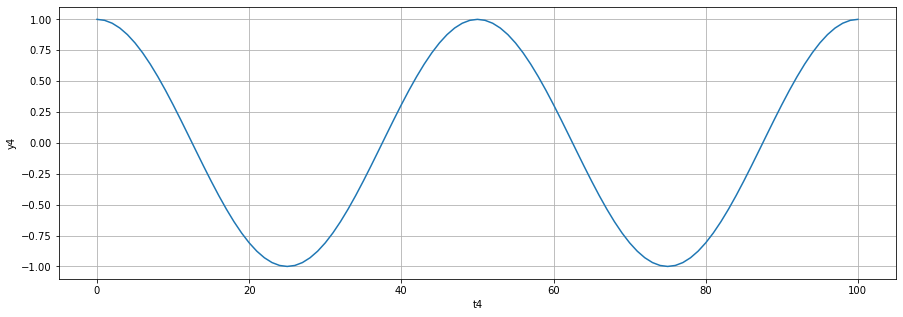

In [46]:
ifft4 = ifft(fft4)

plt.figure(figsize=(15,5))
plt.plot(ifft4)
plt.xlabel('t4')
plt.ylabel('y4')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


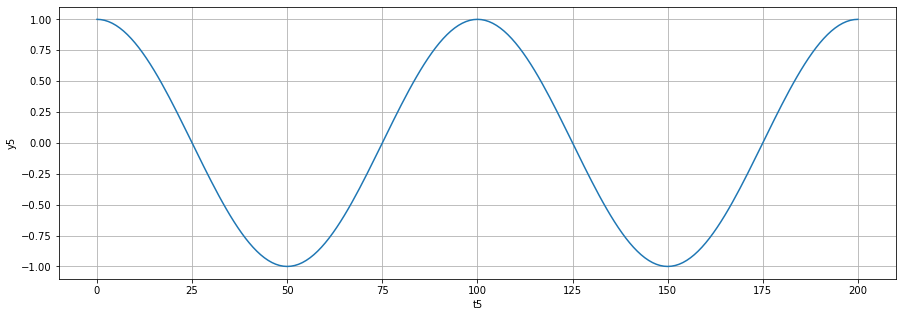

In [47]:
ifft5 = ifft(fft5)

plt.figure(figsize=(15,5))
plt.plot(ifft5)
plt.xlabel('t5')
plt.ylabel('y5')
plt.grid()
plt.show()

#### 5. Lakukan transformasi fourier cepat dan invers transformasi fourier cepat 1 dimensi pada hasil contoh deret fourier yang telah dibuat seblumnya serta visualisasikan!

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


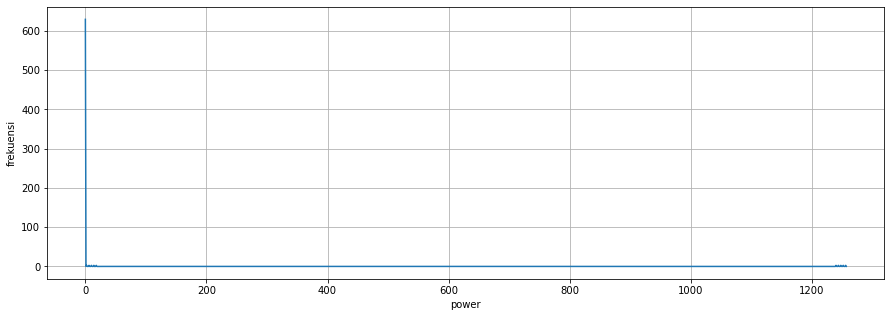

In [48]:
fft_contoh = fft(ft)

plt.figure(figsize=(15,5))
plt.plot(fft_contoh)
plt.xlabel('power')
plt.ylabel('frekuensi')
plt.grid()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


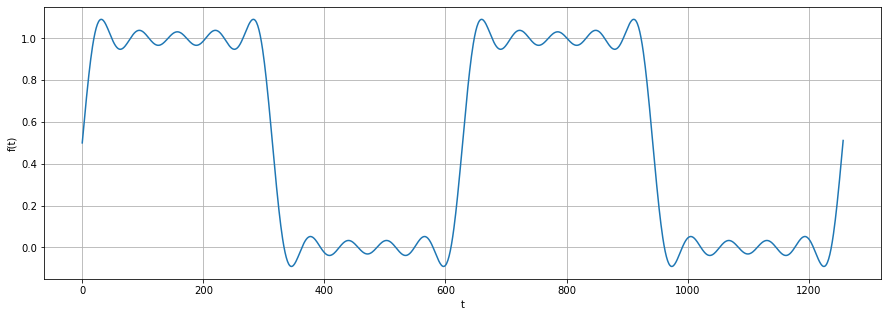

In [49]:
ifft_contoh = ifft(fft_contoh)

plt.figure(figsize=(15,5))
plt.plot(ifft_contoh)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.show()

<header style="width: 100%;">
    <h3 style="text-align: center;">Pertemuan 3</h3>
</header>

#### 6. Buatlah seismogram sintetik dengan n lapisan kemudian variasikan frekuensi ricker dengan 5 Hz, 10 Hz, 15 Hz, 20 Hz, dan 30 Hz. Amati dan visualisasikan!

In [50]:
offset = np.linspace(0.,50,50)
y1 = np.linspace(0.,200.,200)

rho_batuserpih = 2675 # kg/m^3
rho_batugamping = 2710 # kg/m^3

v1 = 3000 # m/s
v2 = 5000 # m/s

AI1 = v1 * rho_batuserpih
AI2 = v2 * rho_batugamping

koefisien_refleksi1 = (AI2 - AI1)/(AI2 + AI1)
koefisien_refleksi2 = (AI1 - AI2)/(AI2 + AI1)

def sintetik_wavelet(ntraces,ns):
    ref = [] # reflektivitas
    traces = []
    for i in range(ntraces):
        R = np.zeros(ns)
        R[52+i] = koefisien_refleksi1
        R[50] = koefisien_refleksi2
        tr = convolve(R,w, mode = 'same') # konvolusi antara reflektivitas dengan ricker wavelet
        ref.append(R)
        traces.append(tr)
    return traces, ref

ns = 200 # lama waktu
ntraces = 51 # banyak geophone
traces, ref = sintetik_wavelet(ntraces,ns)

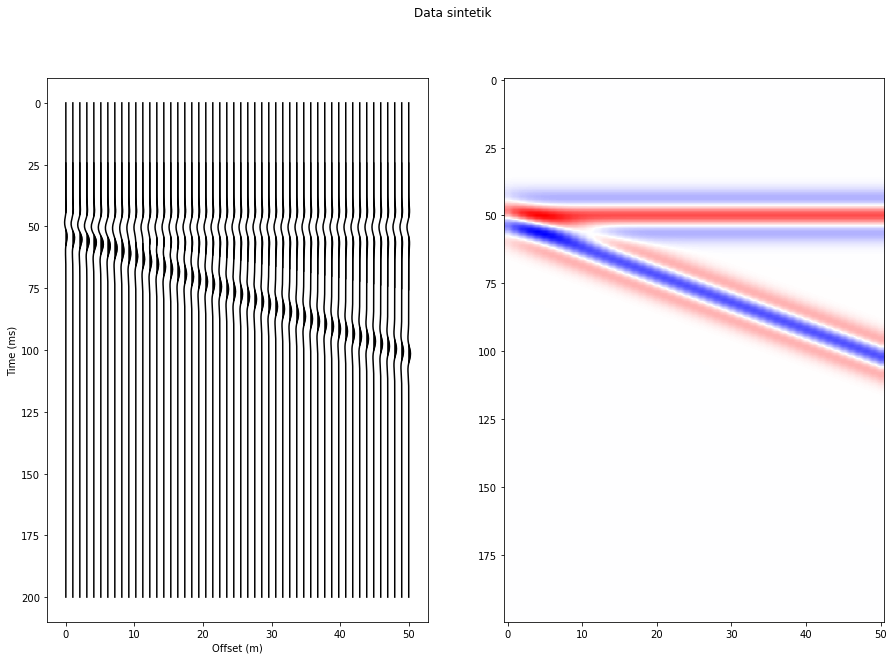

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Data sintetik')

for i in range(ntraces-1):
    r = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r,where=(r>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
# ax[0].plot(np.transpose(traces[0])+0,y1,'r')
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

#### 7. Dari soal no 6, berikan noise sebesar 5%, 10% 20%, 25%, dan 50%. Amatidan visualisasikan!

#### Noise 5%

In [52]:
persentase1 = 0.05
noise1 = np.random.random(200) * persentase1
traces = traces + noise1

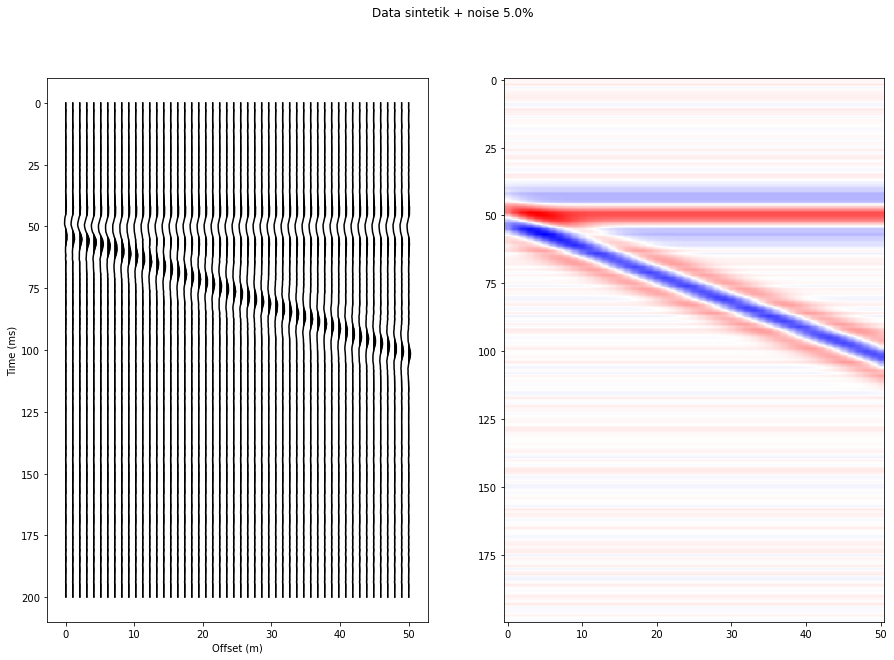

In [53]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase1*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

#### Noise 10

In [54]:
persentase2 = 0.10
noise2 = np.random.random(200) * persentase2 
traces = traces + noise2

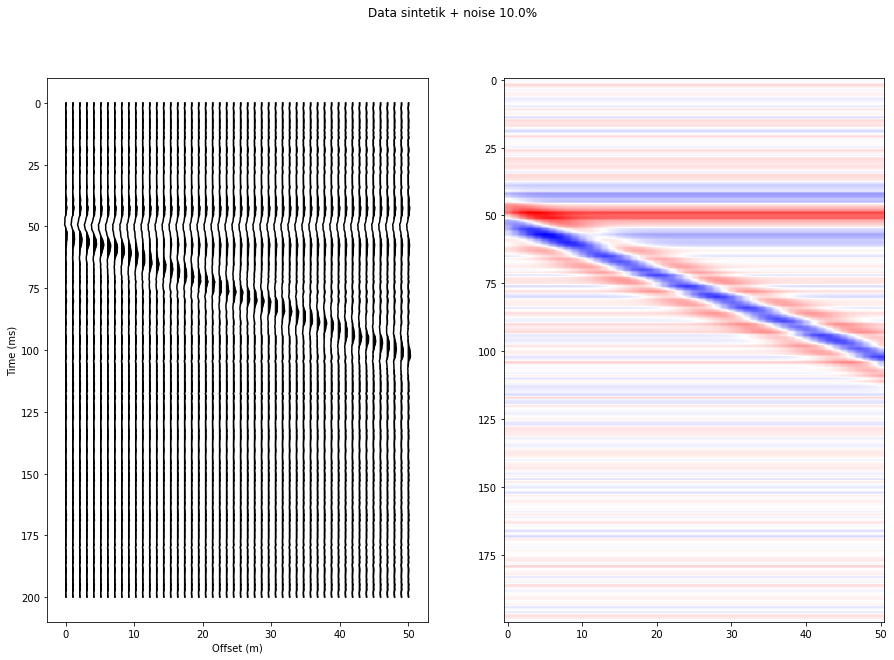

In [55]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase2*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

#### Noise 20

In [56]:
persentase3 = 0.20
noise3 = np.random.random(200) * persentase3 
traces = traces + noise3

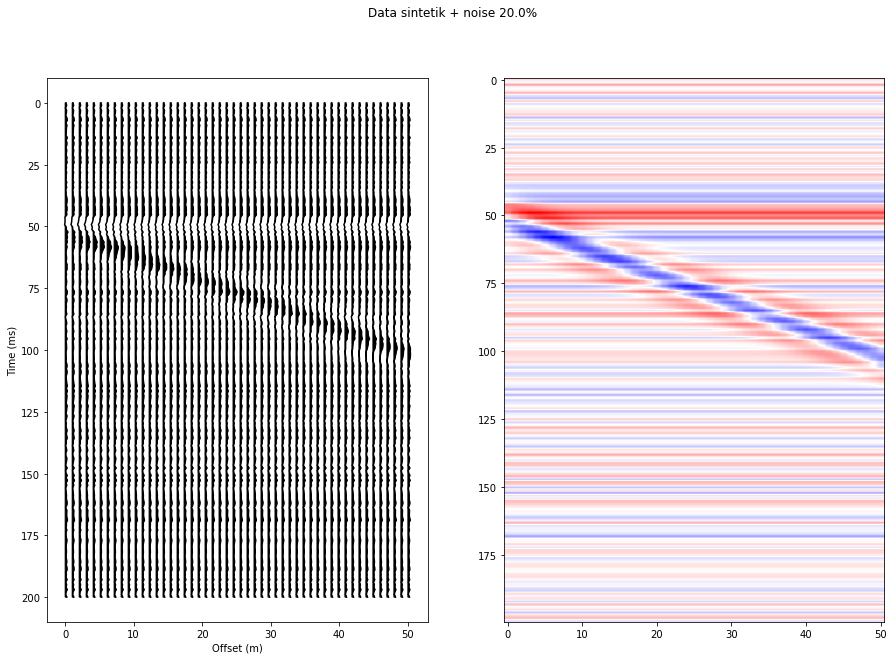

In [57]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase3*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

#### Noise 25

In [58]:
persentase4 = 0.25
noise4 = np.random.random(200) * persentase4
traces = traces + noise4

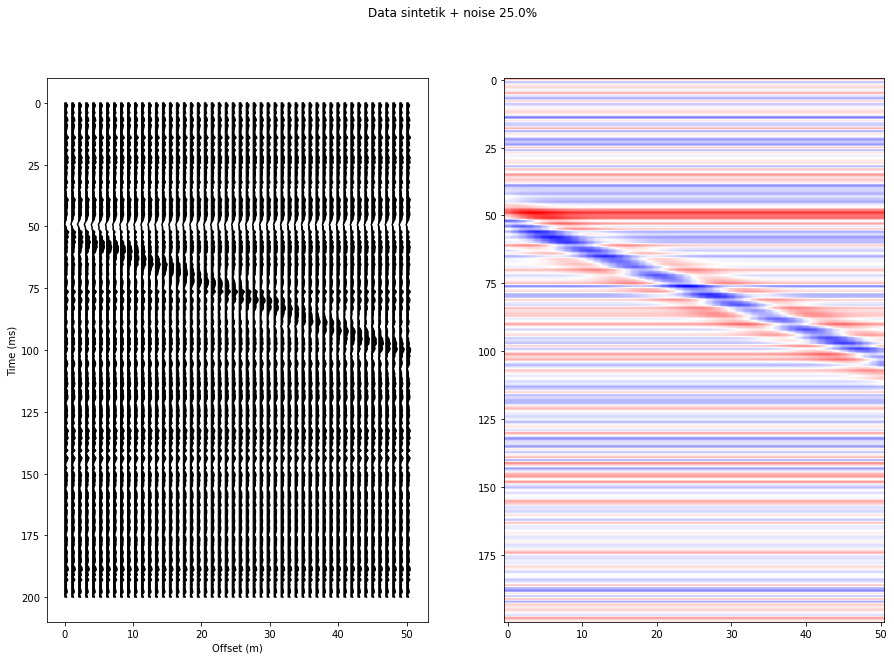

In [59]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase4*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()

#### Noise 50

In [60]:
persentase5 = 0.50
noise5 = np.random.random(200) * persentase5
traces = traces + noise5

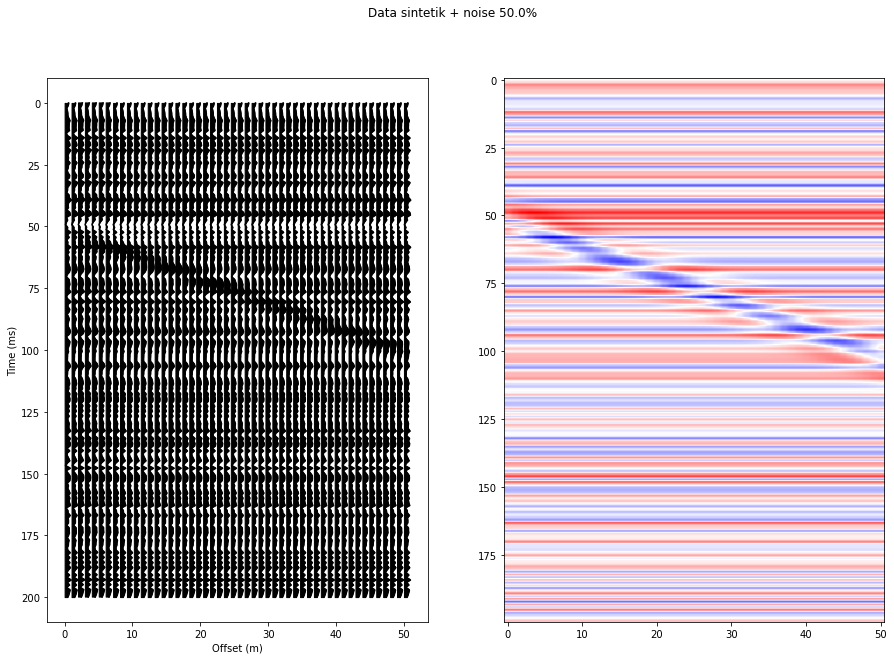

In [61]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
fig.suptitle(f'Data sintetik + noise {persentase5*100}%')

for i in range(ntraces-1):
    r2 = np.transpose(traces[i]) + offset[i]
    ax[0].plot(r2,y1,'k-')
    ax[0].fill_betweenx(y1,offset[i],r2,where=(r2>offset[i]),color='k', interpolate=True)
ax[0].invert_yaxis()
ax[0].set_xlabel("Offset (m)")
ax[0].set_ylabel("Time (ms)")

ax[1].imshow(np.array(np.transpose(traces)), aspect = 'auto', cmap='bwr_r')
plt.show()